<a href="https://colab.research.google.com/github/AkshR21/Heart-Disease-Prediction-Model/blob/main/Heart_Disease_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Prediction Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [2]:
heart = pd.read_csv(r"/content/heart.csv",encoding = "unicode_escape")

In [3]:
heart.shape

(303, 14)

In [4]:
heart.head()

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.columns

Index(['ï»¿age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
heart = heart.rename(columns = {"ï»¿age":"age"})


age:Age of the patient in years
sex:	Gender (1 = Male, 0 = Female)
cp:	Chest pain type (0-3)
trestbps:	Resting blood pressure (in mm Hg)
chol:	Serum cholesterol (mg/dl)
fbs:	Fasting blood sugar (> 120 mg/dl, 1 = True, 0 = False)
restecg:	Resting electrocardiographic results (0-2)
thalach:	Maximum heart rate achieved
exang:	Exercise-induced angina (1 = Yes, 0 = No)
oldpeak:	ST depression induced by exercise
slope:	Slope of the peak exercise ST segment (0-2)
ca:	Number of major vessels (0-3) colored by fluoroscopy
thal:	Thalassemia (0-3, representing normal or defect types)


In [7]:
#cgecking the null values in the dataset
heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
heart.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [9]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
heart["target"].value_counts()

,count
target,
1,165
0,138


In [11]:
heart.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [12]:
x = heart.drop("target",axis=1)

In [13]:
y=heart["target"]

In [14]:
#importing train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.25,stratify = y,random_state = 1)

In [15]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (227, 13) (76, 13)


In [16]:

print(y_train.shape)

(227,)


In [17]:
classifier = RandomForestClassifier(n_estimators=1000)

In [18]:
classifier.fit(x_train,y_train)


RandomForestClassifier(n_estimators=1000)

Accuracy: 0.8289473684210527
Precision: 0.8292682926829268
True neg: 29
False neg: 7
False neg: 6
True pos: 34


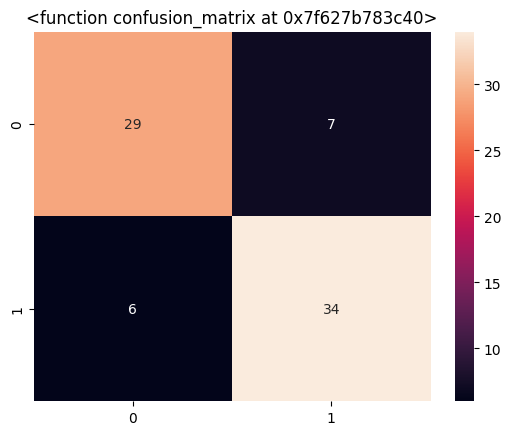

In [19]:
x_test_prediction = classifier.predict(x_test)
cm = confusion_matrix(x_test_prediction,y_test)
ax =sns.heatmap(cm,annot = True)
ax.set_title(confusion_matrix)
print("Accuracy:",accuracy_score(x_test_prediction,y_test))
print("Precision:",precision_score(x_test_prediction,y_test))

true_neg, false_pos, false_neg, true_pos = cm.ravel()
print("True neg:",true_neg)
print("False neg:",false_pos)
print("False neg:",false_neg)
print("True pos:",true_pos)


Text(0.5, 0, 'Importance')

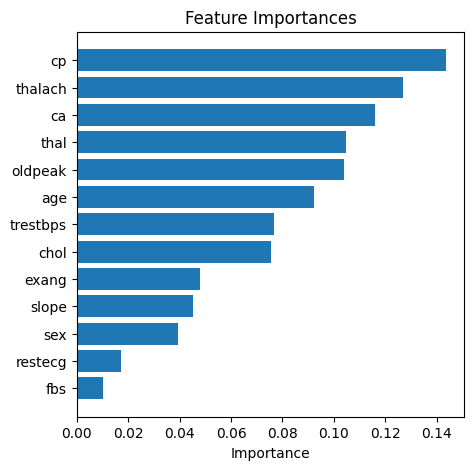

In [20]:
#Feature Importance
plt.figure(figsize=(5,5))
feature_importances = pd.DataFrame({
    'features': x_train.columns,
    'importance': classifier.feature_importances_
}).sort_values(by='importance').reset_index()
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'])
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')

In [25]:
input_array =(54,1,0,110,239,0,1,126,1,2.8,1,1,3)
input_numpy_array =np.asarray(input_array)
input_numpy_array_reshape = input_numpy_array.reshape(1,-1)





In [26]:
prediction = classifier.predict(input_numpy_array_reshape)
if (prediction[0]==1):
  print(" This Person has heart disease")
else:
  print("This Person is fit")

This Person is fit


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
